# LEZIONE 11

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

## Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Soluzione:
Esploro vari valori di sigma e di Ntrain nelle seguenti due figure, per capire come cambiano le prestazioni del modello di Neural Network in funzione di questi

In [ ]:
import numpy as np
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from tensorflow import keras
from tensorflow.keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    return model

m = 2 # slope
b = 1 # intersect
sigmas = np.linspace(0, 0.5, 5)  # valori di rumore

np.random.seed(0)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b

# Creiamo una figura grande con righe = len(sigmas), colonne = 3
fig, axes = plt.subplots(len(sigmas), 3, figsize=(18, 4 * len(sigmas)))

for idx, sigma in enumerate(sigmas):
    print(f"\n==== Training con sigma = {sigma:.2f} ====\n")

    x_train = np.random.uniform(-1, 1, 500)
    y_train = np.random.normal(m * x_train + b, sigma)
    y_valid = np.random.normal(m * x_valid + b, sigma)

    # crea e addestra il modello
    model = create_model()
    history = model.fit(x=x_train, y=y_train, 
                        verbose=0, batch_size=32, epochs=50,
                        shuffle=True,
                        validation_data=(x_valid, y_valid))

    # evaluation
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
    print(f"Test loss vs y_target: {score[0]:.4f} | Test MSE: {score[1]:.4f}")

    # Plot 1: dati reali e validation
    ax1 = axes[idx, 0]
    ax1.plot(x_valid, y_target, label='target')
    ax1.scatter(x_valid, y_valid, color='r', label='validation data')
    ax1.set_title(f"Sigma = {sigma:.2f} - Validation Set")
    ax1.legend()
    ax1.grid(True)

    # Plot 2: andamento della loss
    ax2 = axes[idx, 1]
    ax2.plot(history.history['loss'], label='Train')
    ax2.plot(history.history['val_loss'], label='Validation')
    ax2.set_title(f"Sigma = {sigma:.2f} - Model loss")
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend()
    ax2.grid(True)

    # Plot 3: predizione vs funzione target
    x_predicted = np.linspace(-1, 1, 100)
    y_predicted = model.predict(x_predicted, verbose=0)

    ax3 = axes[idx, 2]
    ax3.plot(x_valid, y_target, label='target')
    ax3.scatter(x_predicted, y_predicted, color='r', label='predicted', s =5)
    ax3.set_title(f"Sigma = {sigma:.2f} - Predizione finale")
    ax3.legend()
    ax3.grid(True)

plt.tight_layout()
plt.show()



2025-07-05 21:24:27.995239: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-05 21:24:28.268323: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-05 21:24:28.447887: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751743468.605392     957 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751743468.663254     957 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751743469.058624     957 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin


==== Training con sigma = 0.00 ====



/home/simonelance/miniconda3/envs/laboTF/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-05 21:24:36.671077: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Test loss vs y_target: 0.0000 | Test MSE: 0.0000

==== Training con sigma = 0.12 ====

Test loss vs y_target: 0.0000 | Test MSE: 0.0000

==== Training con sigma = 0.25 ====

Test loss vs y_target: 0.0001 | Test MSE: 0.0001

==== Training con sigma = 0.38 ====



Nel codice seguente provo invece a variare il numero di valori usati per il training, fissando $\sigma = 0.3$:

parto da un training eseguito con soli 50 valori generati, fino ad arrivare fino a 500 valori di training. Mi aspetto ovviamente che all'aumentare del numero di valori usati per allenare il modello, i modelli predetti nel grafico a destra si avvicinino sempre di più ai valori di target generati con l'espressione analitica.
Infatti se usoun numero troppo piccolo di dati per il training mi aspetto che una eventuale fluttuzione statistica abbia grosse probabilità di influenzare le predizioni del modello.



==== Training con N_train = 50 ====

Test loss vs y_target: 0.0585 | Test MSE: 0.0585

==== Training con N_train = 100 ====

Test loss vs y_target: 0.1698 | Test MSE: 0.1698

==== Training con N_train = 200 ====

Test loss vs y_target: 0.0186 | Test MSE: 0.0186

==== Training con N_train = 500 ====

Test loss vs y_target: 0.0001 | Test MSE: 0.0001


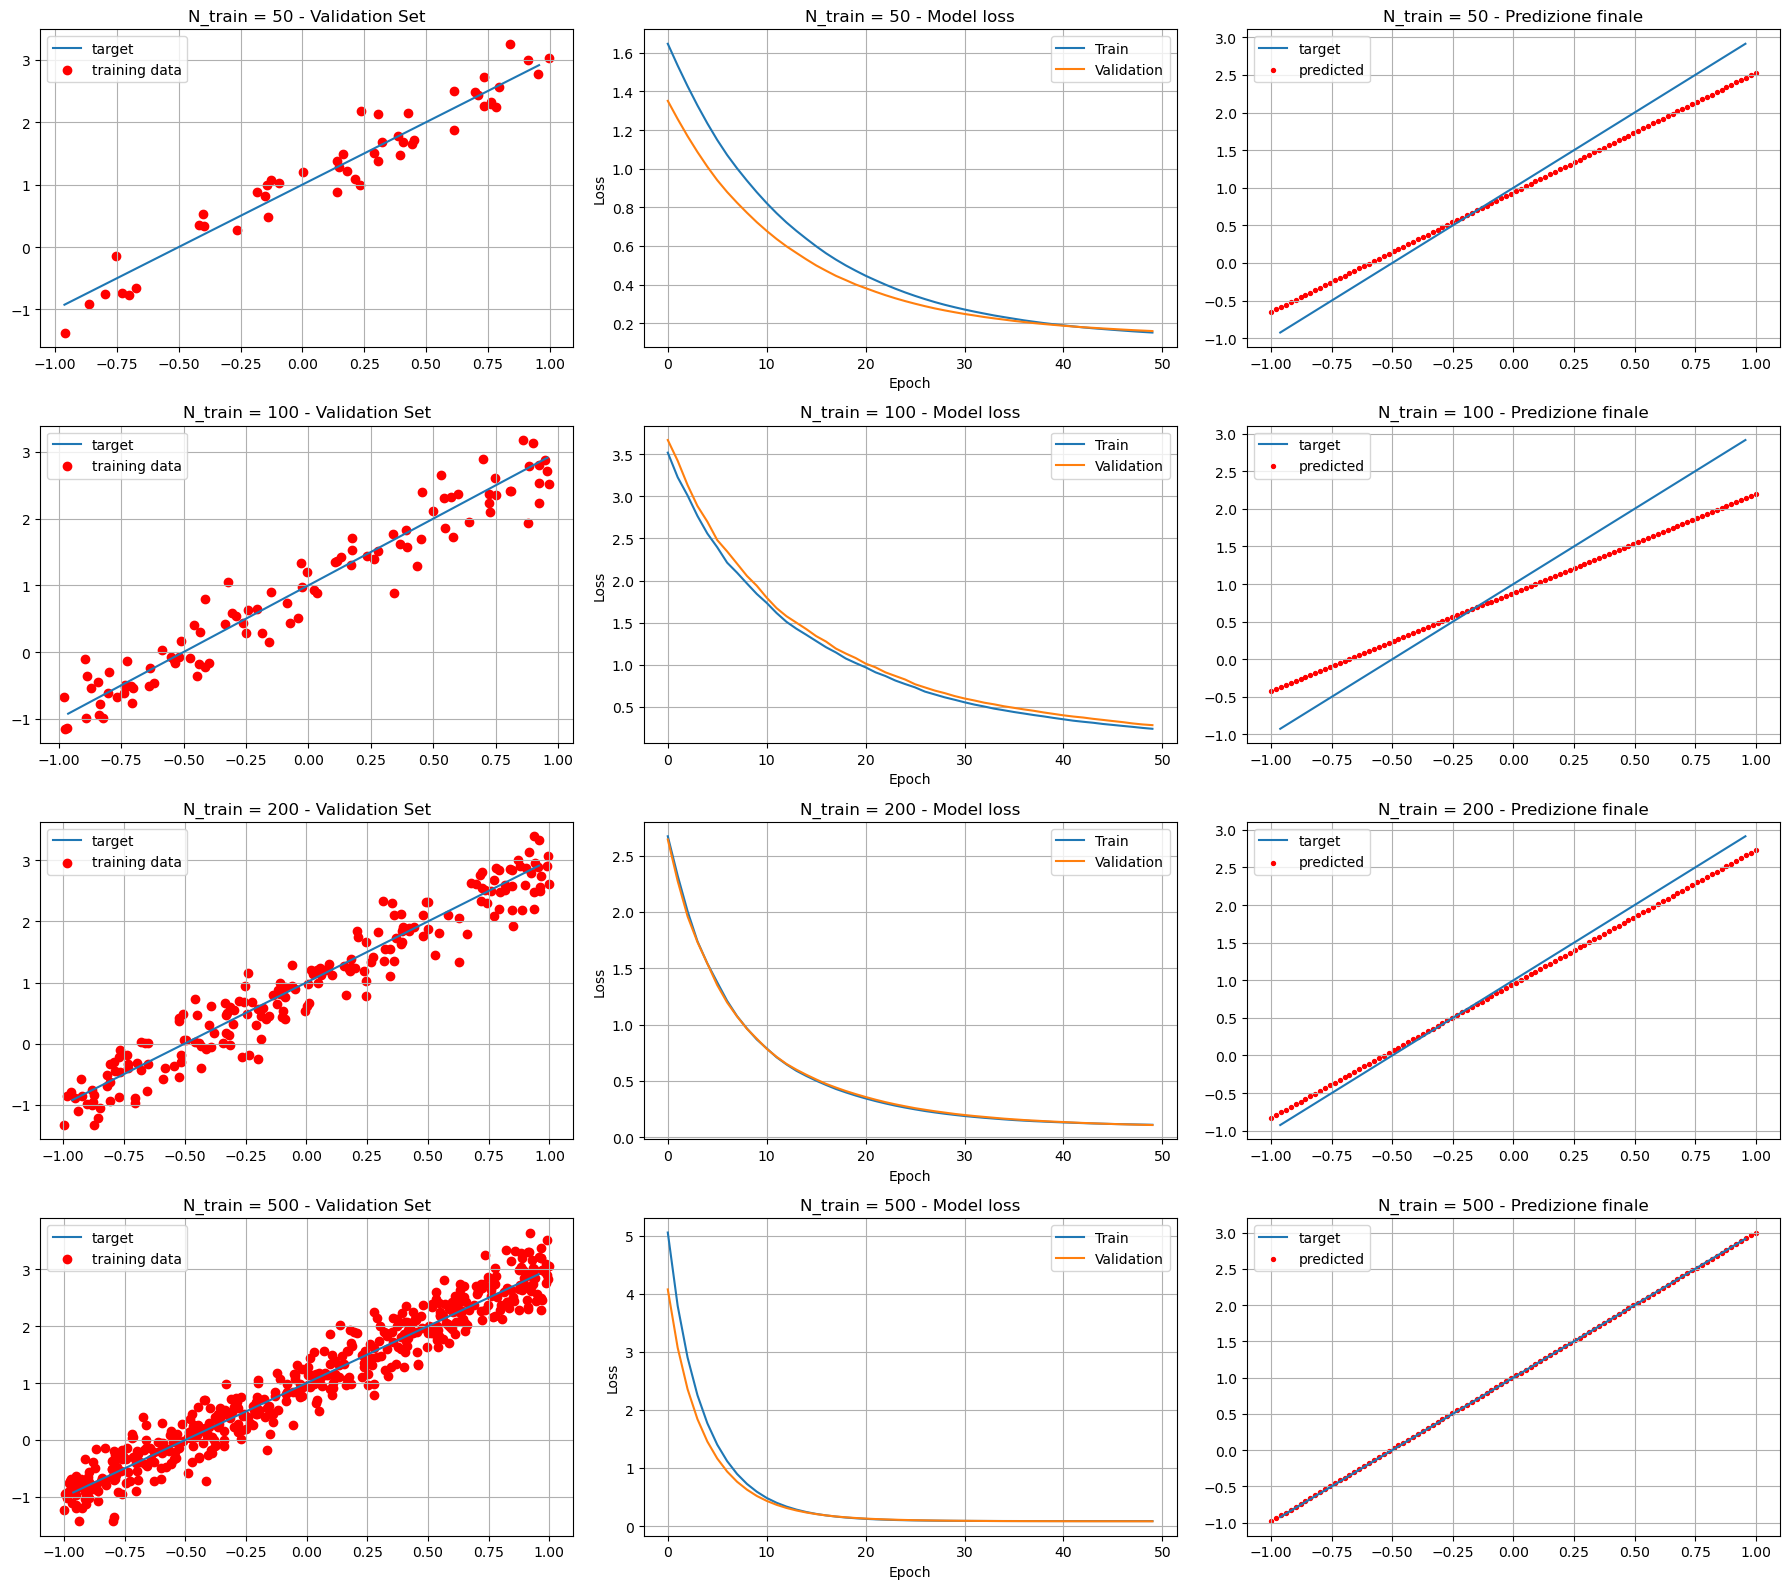

In [ ]:
 # intersect
sigma = 0.3  # rumore fisso

np.random.seed(0)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b
y_valid = np.random.normal(y_target, sigma)

N_train = [50, 100, 200, 500]

fig, axes = plt.subplots(len(N_train), 3, figsize=(18, 4 * len(N_train)))

for idx, N_train in enumerate(N_train):
    print(f"\n==== Training con N_train = {N_train} ====\n")

    x_train = np.random.uniform(-1, 1, N_train)
    y_train = np.random.normal(m * x_train + b, sigma)

    model = create_model()
    history = model.fit(x=x_train, y=y_train,
                        verbose=0, batch_size=32, epochs=50,
                        shuffle=True,
                        validation_data=(x_valid, y_valid))

    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
    print(f"Test loss vs y_target: {score[0]:.4f} | Test MSE: {score[1]:.4f}")

    # Plot 1: dati reali e validation
    ax1 = axes[idx, 0]
    ax1.plot(x_valid, y_target, label='target')
    ax1.scatter(x_train, y_train, color='r', label='training data')
    ax1.set_title(f"N_train = {N_train} - Validation Set")
    ax1.legend()
    ax1.grid(True)

    # Plot 2: andamento della loss
    ax2 = axes[idx, 1]
    ax2.plot(history.history['loss'], label='Train')
    ax2.plot(history.history['val_loss'], label='Validation')
    ax2.set_title(f"N_train = {N_train} - Model loss")
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend()
    ax2.grid(True)

    # Plot 3: predizione vs funzione target
    x_predicted = np.linspace(-1, 1, 100)
    y_predicted = model.predict(x_predicted, verbose=0)

    ax3 = axes[idx, 2]
    ax3.plot(x_valid, y_target, label='target')
    ax3.scatter(x_predicted, y_predicted, color='r', label='predicted', s =8)
    ax3.set_title(f"N_train = {N_train} - Predizione finale")
    ax3.legend()
    ax3.grid(True)

plt.tight_layout()
plt.show()

Le figure mostrate, in particolare quelle sulla destra, mostrano esattamente quello che ci si poteva aspettare anche a priori.

## ESERCIZIO 11.2


In [ ]:
%reset -f

import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from tensorflow import keras
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam


In [ ]:
def func(x, a = 3, b = -2, c = -3, d = 4):
    return a*x**3 + b*x**2 + c*x + d

x_train2 = np.random.uniform(-1, 1, 1000)
x_valid2 = np.random.uniform(-1, 1, 50)
x_valid2.sort()
y_target2 = func(x_valid2) # ideal (target) linear function

sigma2 = 0.4 # noise standard deviation, for the moment it is absent
y_train2 = np.random.normal(func(x_train2), sigma2) # actual measures from which we want to guess regression parameters
y_valid2 = np.random.normal(func(x_valid2) , sigma2)

Nel seguente grafico mostro i valori generati per il training del modello, rispetto ai valori di target

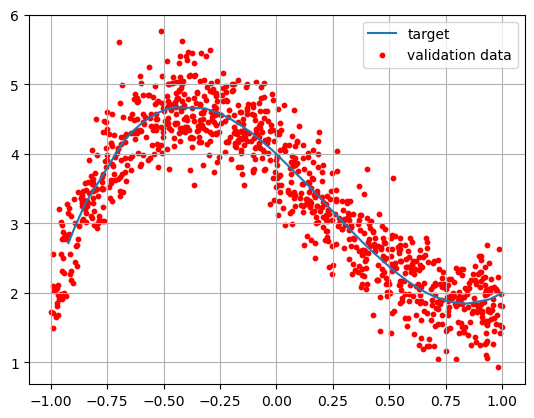

In [ ]:
plt.plot(x_valid2, y_target2, label='target')
plt.scatter(x_train2, y_train2, color='r', label='validation data', s=10)
plt.legend()
plt.grid(True)
plt.show()

Vado poi a valutare come agiscono varie funzioni di attivazione e vari optimizers sulle prestazioni del modello:

In [ ]:
ep= 100
n_neurons= 30
history=[]
actf = ['relu', 'tanh', 'gelu', 'sigmoid', 'selu', 'softmax', 'swish', 'exponential']
models=[]

from tensorflow.keras.optimizers import Adam


score = []  

for i in range(len(actf)) :   
    
    # Crea un nuovo modello a ogni ciclo
    model = Sequential()
    model.add(Dense(40, input_shape=(1,), activation=actf[i]))
    model.add(Dense(20, activation=actf[i]))
    model.add(Dense(1))  # output layer lineare
    
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mse'])

    models.append(model)
    
    history.append(model.fit(
        x=x_train2, y=y_train2, 
        batch_size=32, epochs=ep,
        shuffle=True, validation_data=(x_valid2, y_valid2),
        verbose=0  # silenzioso
    ))

    score.append(model.evaluate(x_valid2, y_valid2, batch_size=32, verbose=0))
    print(f"Epoche: {ep},  Validation Loss: {score[i][0]:.4f}, Modello con activation function: {actf[i]}")

    # incrementa parametri
    



Epoche: 100,  Validation Loss: 0.2311, Modello con activation function: relu
Epoche: 100,  Validation Loss: 0.2152, Modello con activation function: tanh
Epoche: 100,  Validation Loss: 0.2320, Modello con activation function: gelu
Epoche: 100,  Validation Loss: 0.2252, Modello con activation function: sigmoid
Epoche: 100,  Validation Loss: 0.2540, Modello con activation function: selu
Epoche: 100,  Validation Loss: 0.2155, Modello con activation function: softmax
Epoche: 100,  Validation Loss: 0.2258, Modello con activation function: swish
Epoche: 100,  Validation Loss: 0.2138, Modello con activation function: exponential


In [ ]:
scores = {}
for i in range(len(actf)):
    print("Model with activation function: {c} , {actf}".format( c= i, actf=actf[i]))
    w = models[i].get_weights()

    score = models[i].evaluate(x_valid2, y_valid2, batch_size = 32, verbose = 0)
    print('Test loss:\t\t', score[0])
    print('Test accuracy:\t\t', score[1])

    score = models[i].evaluate(x_valid2, y_target2, batch_size = 32, verbose = 0)
    print('Test loss exact:\t', score[0])
    print('Test accuracy exact:\t', score[1])

    

Model with activation function: 0 , relu
Test loss:		 0.23111635446548462
Test accuracy:		 0.23111635446548462
Test loss exact:	 0.015020806342363358
Test accuracy exact:	 0.015020806342363358
Model with activation function: 1 , tanh
Test loss:		 0.21517176926136017
Test accuracy:		 0.21517176926136017
Test loss exact:	 0.008210972882807255
Test accuracy exact:	 0.008210972882807255
Model with activation function: 2 , gelu
Test loss:		 0.23203878104686737
Test accuracy:		 0.23203878104686737
Test loss exact:	 0.02184404619038105
Test accuracy exact:	 0.02184404619038105
Model with activation function: 3 , sigmoid
Test loss:		 0.22517921030521393
Test accuracy:		 0.22517921030521393
Test loss exact:	 0.018058542162179947
Test accuracy exact:	 0.018058542162179947
Model with activation function: 4 , selu
Test loss:		 0.25396502017974854
Test accuracy:		 0.25396502017974854
Test loss exact:	 0.06122440844774246
Test accuracy exact:	 0.06122440844774246
Model with activation function: 5 , 

I risultati sono piuttosto simili, la funzione di attivazione peggiore risulta essere quella `exponential`, mentre la migliore è `tanh` con optimizer `Adam`

Tramite il parametro Selected vado a selezionare il modello allenato con la act_func=`tanh`e a vedere le performance predittive:

- vado ad osservale la capacità di predire valori nel rage di x uguale a quello utilizzato per il training

- inoltre vado a vedere come si comporti il modello nel predire valori all'esterno del range di x usato nel training

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


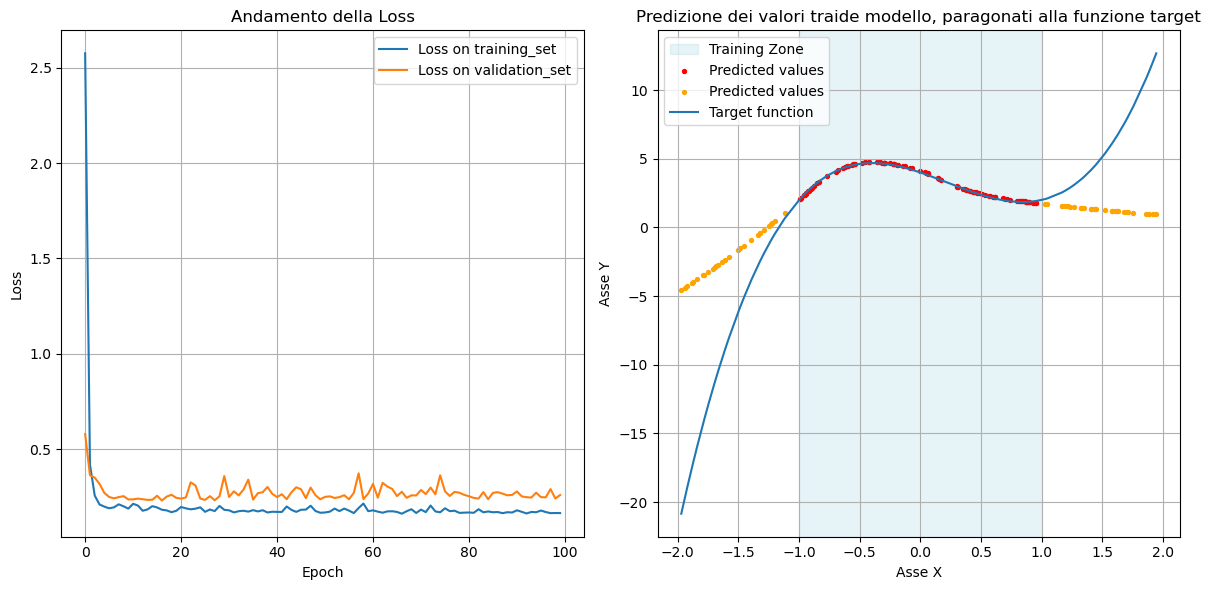

In [ ]:


selected= 1

fig, axes = plt.subplots(1,2, figsize=(12, 6))  # 1 row, 3 columns

#PRIMO PLOT
ax = axes[0]
ax.set_title(f"Andamento della Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.plot(history[selected].history['loss'], label ='Loss su training_set')
ax.plot(history[selected].history['val_loss'], label ='Loss su validation_set')
ax.legend()
ax.grid()

#SECONDO PLOT
ax2 = axes[1]
x_predicted = np.random.uniform(-1, 1, 100)
x_out = np.concatenate([np.random.uniform(-2, -1, 30), np.random.uniform(1, 2, 30)])
x_tot= np.concatenate([ x_predicted, x_out])
x_tot.sort()
y_predicted = models[selected].predict(x_predicted)

y_target_tot = func(x_tot)
y_out = models[selected].predict(x_out)
ax2.set_title(f"Predizione dei valori del modello, paragonati alla funzione target")
ax2.set_xlabel("Asse X")
ax2.set_ylabel("Asse Y")
ax2.axvspan(-1, 1, color='lightblue', alpha=0.3, label='Training Zone')
ax2.scatter(x_predicted, y_predicted,color='r', s=8 , label = 'Predicted values')
ax2.scatter(x_out, y_out ,color='orange', s=8 , label='Predicted values')
ax2.plot(x_tot, y_target_tot ,  label='Target function')
ax2.grid(True)
ax2.legend()


plt.tight_layout()
plt.show()


Come ci si poteva aspettare il modello è preciso nel training_range, mentre si discosta dalla funzione analitica al di fuori di esso.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Vado ad allenare il modello su una funzione 3D, con lo stesso metodo utilizzato fino ad ora.

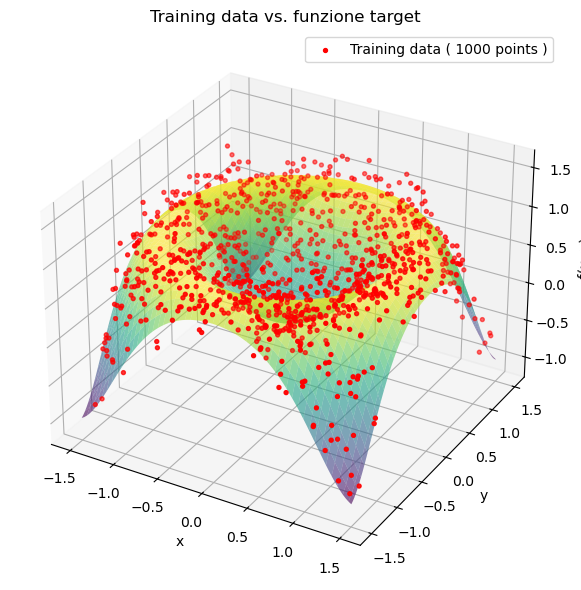

In [ ]:
%reset -f
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  

def func(x, y):
    return np.sin( x**2 + y**2)

x_train = np.random.uniform(-1.5, 1.5, 1000)
y_train = np.random.uniform(-1.5, 1.5, 1000)
x_valid = np.random.uniform(-1.5, 1.5, 100)
y_valid = np.random.uniform(-1.5, 1.5, 100)

z_target = func(x_valid, y_valid) # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(func(x_train, y_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(func(x_valid, y_valid) , sigma)


x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# Crea figura 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# ✅ Superficie
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# ✅ Dati di training come scatter
ax.scatter(x_train, y_train, z_train, color='r', s=8, label="Training data ( 1000 points )")

# Etichette e legenda
ax.set_title("Training data vs. funzione target")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
nep= 200
n_neurons= 30

pair_train  = np.column_stack((x_train, y_train))   
pair_valid  = np.column_stack((x_valid, y_valid))   

modeltanh = tf.keras.Sequential()
modeltanh.add(Dense(40, input_shape = (2,), activation = 'tanh'))
modeltanh.add(Dense(20, activation = 'tanh'))
modeltanh.add(Dense(1, activation = 'tanh'))
modeltanh.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
modeltanh.fit(x = pair_train, y = z_train, verbose =0, batch_size = 32, epochs = nep, shuffle = True, validation_data = (pair_valid, z_valid))
historytanh = modeltanh.fit(x = pair_train, y = z_train, verbose=0, batch_size = 32, epochs = nep, shuffle = True, validation_data = (pair_valid, z_valid))

#questo score mi dice come il modello agisce rispetto al campione di validazione in cui lafunzione è falutata con un certo sigma predefinito
score = modeltanh.evaluate(pair_valid, z_valid, batch_size = 32, verbose = 0)
print('Test loss:\t\t', score[0])
print('Test accuracy:\t\t', score[1])

#qui invece vedo come il modello predice rispetto alla funzione target esatta 
score = modeltanh.evaluate(pair_valid, z_target, batch_size = 32, verbose = 0)
print('Test loss:\t\t', score[0])
print('Test accuracy:\t\t', score[1])

/home/simonelance/miniconda3/envs/laboTF/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test loss:		 0.061581067740917206
Test accuracy:		 0.061581067740917206
Test loss:		 0.008324408903717995
Test accuracy:		 0.008324408903717995


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


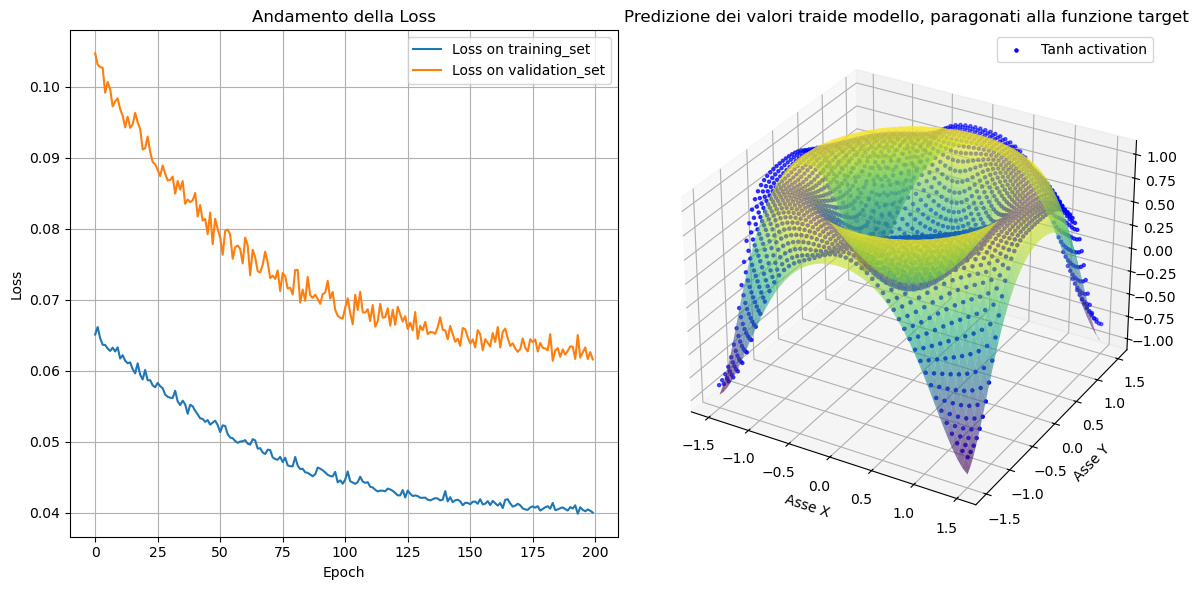

In [ ]:
fig = plt.figure(figsize=(12, 6))

#PRIMO PLOT
ax = fig.add_subplot(1, 2, 1)

ax.set_title(f"Andamento della Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.plot(historytanh.history['loss'], label ='Loss on training_set')
ax.plot(historytanh.history['val_loss'], label ='Loss on validation_set')
ax.legend()
ax.grid()

#SECONDO PLOT
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
x_predicted = np.linspace(-3./2, 3./2, 50) 
y_predicted = np.linspace(-3./2, 3./2, 50)
x, y = np.meshgrid(x_predicted, y_predicted)
pair_pred = np.column_stack((x.ravel(), y.ravel()))
#pair_pred= np.column_stack((x_predicted,y_predicted))
z_pred = modeltanh.predict(pair_pred).reshape(x.shape)


z_target = func(x, y)
ax2.set_title(f"Predizione dei valori traide modello, paragonati alla funzione target")
ax2.set_xlabel("Asse X")
ax2.set_ylabel("Asse Y")
ax2.plot_surface(x, y, z_target, cmap='viridis', alpha=0.6)
ax2.scatter(pair_pred[:,0], pair_pred[:,1], z_pred.ravel(), marker = ".", color = "b", label = 'Tanh activation')
ax2.grid(True)
ax2.legend()


plt.tight_layout()
plt.show()


Noto che il modello è in grado di produrre buoni risultati predittivi anche su funzioni a più variabili.